##Missing Audio Files Detection

In [ ]:
import os
def find_missing_files(folder_path):
    files = os.listdir(folder_path)
    file_numbers = set()

    for file in files:
        if file.endswith('.wav'):
            file_name = os.path.splitext(file)[0]
            try:
                file_number = int(file_name)
                file_numbers.add(file_number)
            except ValueError:
                pass

    missing_files = [] ; expected_number = min(file_numbers);max_number = max(file_numbers)
    for num in range(expected_number, max_number):
        if num not in file_numbers:
            missing_files.append(f"{num}.wav")

    return missing_files

# Replace 'path_to_your_folder' with the path to your audio folder
folder_path = '/content/audio';missing_files = find_missing_files(folder_path)
if missing_files:
    print("Missing files:")
    for file in missing_files:
        print(file)
else:
    print("No missing files found.")


Missing files:
2.wav
4.wav
5.wav
8.wav
9.wav


##Spectrogram & Waveform

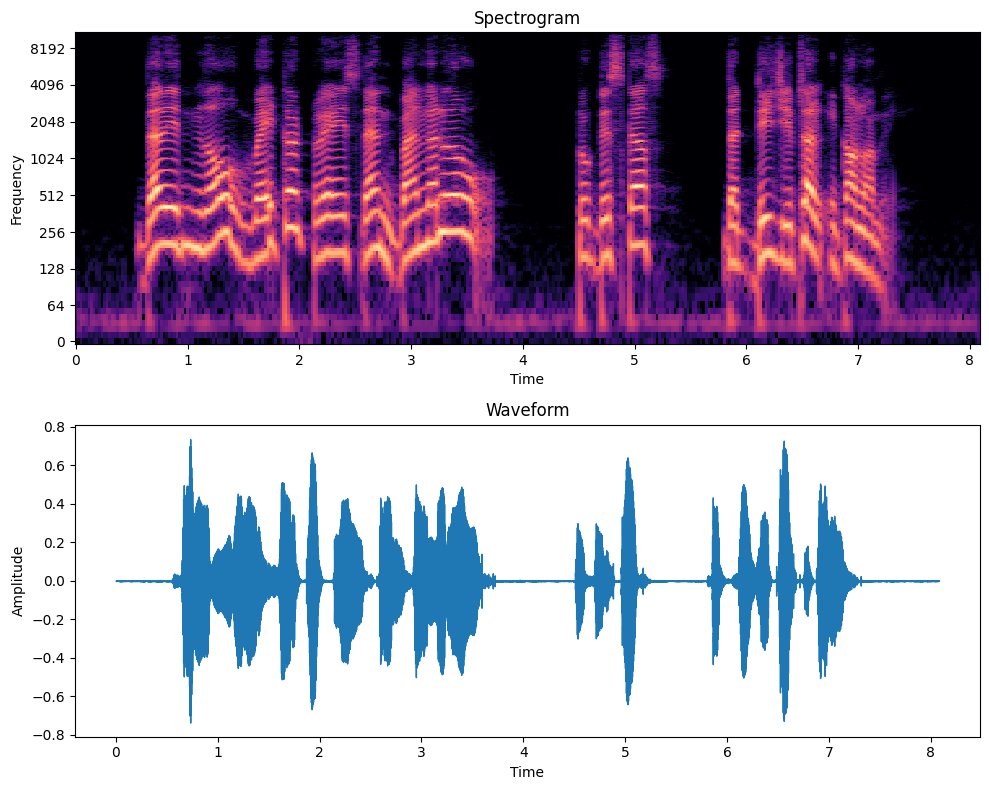

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load audio file
audio_path = '4.wav'  # Replace with the path to your audio file
y, sr = librosa.load(audio_path)

# Set up figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Generate Spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', ax=axs[0])
axs[0].set_title('Spectrogram')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Frequency')

# Generate Waveform
librosa.display.waveshow(y, sr=sr, ax=axs[1])
axs[1].set_title('Waveform')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()


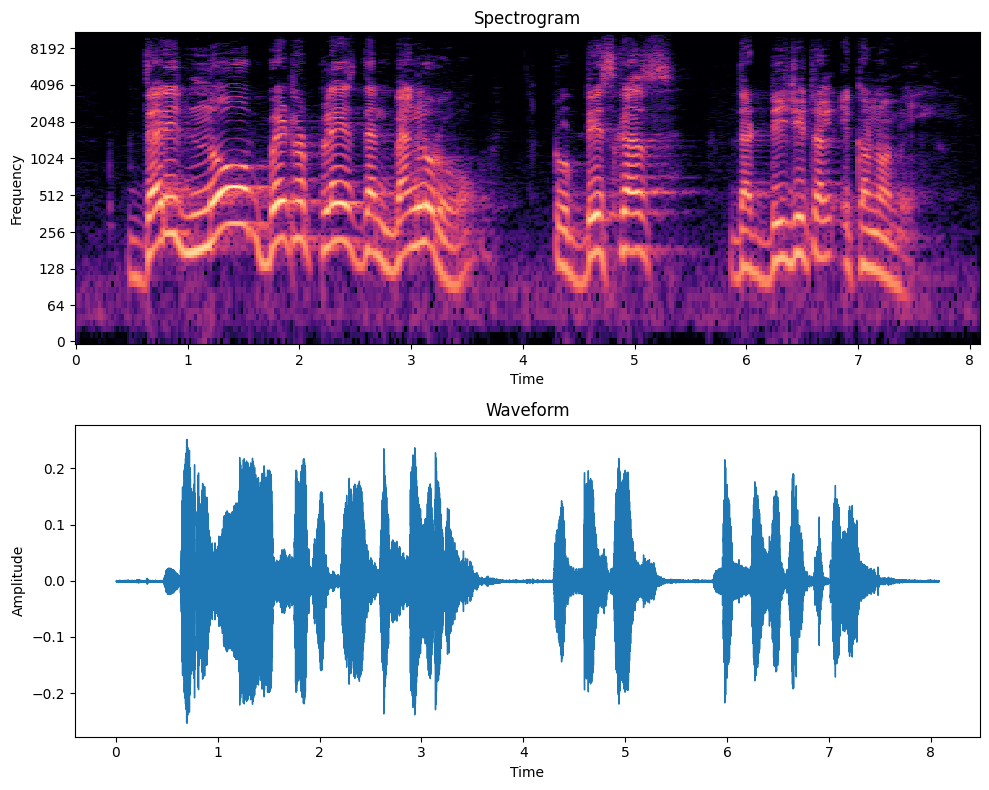

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load audio file
audio_path = 'modi_en_0004.wav'  # Replace with the path to your audio file
y, sr = librosa.load(audio_path)

# Set up figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Generate Spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', ax=axs[0])
axs[0].set_title('Spectrogram')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Frequency')

# Generate Waveform
librosa.display.waveshow(y, sr=sr, ax=axs[1])
axs[1].set_title('Waveform')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Amplitude')

plt.tight_layout()
plt.show()


##Next_word_pred_hindi

In [ ]:
# source text
data = """सितारे दिन में नहीं दिखते\n
कुछ लोगों को चाय अच्छी लगती है और कुछ लोगों को कॉफ़ी\n
जब मैं अठारह साल का था मैंने गाड़ी चलानी सीखी और लाईसेंस बनवालिया\n
मुझे आपसे मिलकर बहुत खुशी हुई \n """
print(data)

सितारे दिन में नहीं दिखते

कुछ लोगों को चाय अच्छी लगती है और कुछ लोगों को कॉफ़ी

जब मैं अठारह साल का था मैंने गाड़ी चलानी सीखी और लाईसेंस बनवालिया

मुझे आपसे मिलकर बहुत खुशी हुई 
 


In [ ]:
file_path = 'final_hindi.txt'  # Provide the correct path to your file
start_line = 1  # Start line number
end_line = 5000  # End line number
lines_to_read = end_line - start_line + 1  # Calculate the number of lines to read
with open(file_path, 'r', encoding='utf-8') as file:
    # Read lines from start_line to end_line
    lines = [next(file) for _ in range(end_line)]
# Join the selected lines to form the data string
data = ''.join(lines)
# Display the content of the selected lines
print(data)

In [ ]:
import numpy as np
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

In [ ]:
# # generate a sequence from a language model
# def generate_seq(model, tokenizer, max_length, seed_text, n_words):
# 	in_text = seed_text
#     # generate a fixed number of words
# 	for _ in range(n_words):
#         # encode the text as integer
# 		encoded = tokenizer.texts_to_sequences([in_text])[0]
# 		# pre-pad sequences to a fixed length
# 		encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')
# 		# predict probabilities for each word
# 		yhat = model.predict_classes(encoded, verbose=0)
# 		# map predicted word index to word
# 		out_word = ''
# 		for word, index in tokenizer.word_index.items():
# 			if index == yhat:
# 				out_word = word
# 				break
# 		# append to input
# 		in_text += ' ' + out_word
# 	return in_text

# generate a sequence from a language model
def generate_seq(model, tokenizer, max_length, seed_text, n_words):
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # pre-pad sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')
        # predict probabilities for each word
        yhat = model.predict(encoded, verbose=0)
        # get the index of the word with the highest probability
        predicted_word_index = np.argmax(yhat)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == predicted_word_index:
                out_word = word
                break
        # append to input
        in_text += ' ' + out_word
    return in_text

In [ ]:
# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
encoded = tokenizer.texts_to_sequences([data])[0]

In [ ]:
# retrieve vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# encode 2 words -> 1 word
sequences = list()
for i in range(2, len(encoded)):
	sequence = encoded[i-2:i+1]
	sequences.append(sequence)

Vocabulary Size: 9768


In [ ]:
print('Total Sequences: %d' % len(sequences))
# pad sequences
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')
print('Max Sequence Length: %d' % max_length)

Total Sequences: 76443
Max Sequence Length: 3


In [ ]:
# split into input and output elements
sequences = array(sequences)
X, y = sequences[:,:-1],sequences[:,-1]

#print(X)
y = to_categorical(y, num_classes=vocab_size)
#print(y)
# define model
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=max_length-1))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation='softmax'))

In [ ]:
print(model.summary())
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network
model.fit(X, y, epochs=500, verbose=2)
# evaluate model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2, 10)             97680     
                                                                 
 lstm (LSTM)                 (None, 50)                12200     
                                                                 
 dense (Dense)               (None, 9768)              498168    
                                                                 
Total params: 608048 (2.32 MB)
Trainable params: 608048 (2.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/500
2389/2389 - 18s - loss: 2.6650 - accuracy: 0.4445 - 18s/epoch - 8ms/step
Epoch 2/500
2389/2389 - 16s - loss: 2.6003 - accuracy: 0.4538 - 16s/epoch - 7ms/step
Epoch 3/500
2389/2389 - 15s - loss: 2.5701 - accuracy: 0.4564 - 15s/epoch - 6ms/step
Epoch 4/500
2389/2389 - 

KeyboardInterrupt: ignored

In [ ]:
model.save('model_hin_nxt.h5')
import pickle
# Assuming 'tokenizer' is your Keras Tokenizer
tokenizer_save_path = 'tokenizer.pickle'  # File path to save the tokenizer

# Save the tokenizer using pickle
with open(tokenizer_save_path, 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
print(generate_seq(model, tokenizer, max_length-1, 'सितारे दिन में', 2))
print(generate_seq(model, tokenizer, max_length-1, 'कुछ लोगों को', 2))
print(generate_seq(model, tokenizer, max_length-1, 'साल का था मैंने गाड़ी चलानी', 2))
print(generate_seq(model, tokenizer, max_length-1, 'आपसे मिलकर', 2))
print(generate_seq(model, tokenizer, max_length-1, 'मेरा नाम', 2))

सितारे दिन में नहीं दिखते
कुछ लोगों को कॉफ़ी जब
साल का था मैंने गाड़ी चलानी सीखी और
आपसे मिलकर बहुत खुशी
मेरा नाम कुछ लोगों


In [ ]:
print(generate_seq(model, tokenizer, max_length-1, 'गोदान मुंशी प्रेमचंद के', 2)) #line16
print(generate_seq(model, tokenizer, max_length-1, 'उनके बेटे गोबर शहर में', 2)) #line15
print(generate_seq(model, tokenizer, max_length-1, 'हरी का काम बंद करने', 2)) #line14
print(generate_seq(model, tokenizer, max_length-1, 'एक अंग्रेजी-हिंदी कोश', 2)) #line5000
print(generate_seq(model, tokenizer, max_length-1, 'धूम्रपान करते हुए हल्कू भूमि', 2)) #line30

गोदान मुंशी प्रेमचंद के प्रमुख हिट
उनके बेटे गोबर शहर में एक अजीब
हरी का काम बंद करने के लिए
एक अंग्रेजी-हिंदी कोश भी तैयार
धूम्रपान करते हुए हल्कू भूमि के आधिपत्य
